# TITANIC - Projeto II
### Introdução
Com base levantados nesta [fonte](https://www.kaggle.com/c/titanic/data), será avaliado relações dos sobreviventes e dos que pereceram da tragédia com sua idade, classe que pertenciam no navio, sexo, faixa etária e o porto de onde embarcaram.

In [1]:
# Importando dependências
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
# Carregando os dados
df = pd.read_csv('titanic-data-6.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Perguntas
1. Com base nos dados, quantos sobreviveram e quantos não?
9. Qual a idade média dos sobreviventes e dos não sobreviventes?
9. Qual a relação de sobreviventes e não sobreviventes por classe?
9. Qual a relação de sobreviventes e não sobreviventes por sexo?
9. Qual a faixa etária com mais sobreviventes e dos não sobreviventes?

## Limpeza dos dados
Os dados "Ticket", "Fare", "Cabin", "Sib Sp" e "Parch" serão removidos, pois não terão utilizades para os questionamentos levantados. Além disso, serão removidos registros que não contém a idade do passageiro.

In [3]:
# Renomeando as colunas
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Removendo colunas que não serão usadas
df.drop(['sibsp', 'parch', 'ticket', 'fare', 'cabin'], axis=1, inplace=True)
df.head()

,survived,pclass,name,sex,age,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,S


In [ ]:
# Verificando registros com dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
embarked    889 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 41.8+ KB


In [ ]:
# Removendo registros com a idade e porto de embarque faltantes
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
survived    712 non-null int64
pclass      712 non-null int64
name        712 non-null object
sex         712 non-null object
age         712 non-null float64
embarked    712 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 38.9+ KB


In [ ]:
# Verificando se há registros duplicados
df.duplicated().sum()

0

In [ ]:
# Salvando conjunto de dados modificado
df.to_csv('titanic-clean.csv', index=False)

## Separação dos dados
Para facilitar a resposta dos questionamentos, o conjunto de dados principal será dividido em dois conjuntos: sobreviventes e não sobreviventes.

In [ ]:
df_survived = df.query('survived == 1')
df_not_survived = df.query('survived == 0')
df_survived.to_csv('titanic_survived.csv', index=False)
df_not_survived.to_csv('titanic_not_survived.csv', index=False)

## Análise


288 sobreviventes e 424 não sobreviventes.


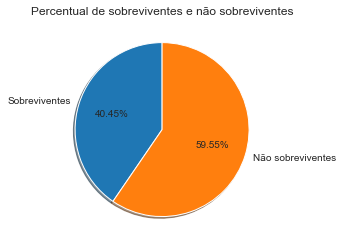

In [ ]:
# Q1: Com base nos dados, quantos sobreviveram e quantos não?
print("{0} sobreviventes e {1} não sobreviventes.".format(df_survived.shape[0], df_not_survived.shape[0]))
counts = [df_survived.shape[0]  / df.shape[0] * 100, df_not_survived.shape[0] / df.shape[0] * 100]
labels = "Sobreviventes", "Não sobreviventes"
plt.pie(counts, labels=labels, shadow=True, startangle=90, autopct='%1.2f%%')
plt.title('Percentual de sobreviventes e não sobreviventes');


In [ ]:
# Q2: Qual a idade média dos sobreviventes e dos não sobreviventes?
print("Idade média dos sobreviventes: {0} anos. Idade média dos não sobreviventes: {1} anos. A média de idade foi aproximada."
      .format(round(df_survived.describe()['age']['mean'], 2), round(df_not_survived.describe()['age']['mean'], 2)))

Idade média dos sobreviventes: 28.19 anos. Idade média dos não sobreviventes: 30.63 anos. A média de idade foi aproximada.


In [ ]:
# Q3: Qual a relação de sobreviventes e não sobreviventes por classe?

# Contagem sobreviventes e não por classe
df_survived_by_class = df_survived.groupby("pclass")['survived'].count() / df.shape[0] * 100
df_not_survived_by_class = df_not_survived.groupby("pclass")['survived'].count() / df.shape[0] * 100
# Localização no eixo x dos grupos
ind = np.arange(len(df_survived_class))
width = 0.3 #largura das barras
#Definindo as barras do gráfico
survived_bars = plt.bar(ind, df_survived_by_class, width, color='b', alpha=.5, label='Sobreviventes')
not_survived_bars = plt.bar(ind + width, df_not_survived_by_class, width, color='r', alpha=.5, label='Não Sobreviveram')

# Gerando o gráfico por classe
plt.title('Relação de sobreviventes e não sobreviventes por classe')
labels = ['Primeira', 'Segunda', 'Terceira']
locations = ind + width / 2
plt.xticks(locations, labels, fontsize=12)
plt.ylabel('Porporção de passageiros(%)', fontsize=15)
plt.xlabel('Classe', fontsize=20)
plt.legend();

In [ ]:
print('De acordo com o gráfico, pereceram mais passeiros da terceira classe')

In [ ]:
# Q4: Qual a relação de sobreviventes e não sobreviventes por sexo?
# Contagem sobreviventes e não por sexo
df_survived_by_sex = df_survived.groupby("sex")['survived'].count() / df.shape[0] * 100
df_not_survived_by_sex = df_not_survived.groupby("sex")['survived'].count() / df.shape[0] * 100
# Localização no eixo x dos grupos
ind = np.arange(len(df_survived_by_sex))
width = 0.3 #largura das barras
#Definindo as barras do gráfico
survived_bars = plt.bar(ind, df_survived_by_sex, width, color='b', alpha=.5, label='Sobreviventes')#Barra dos sobreviventes
not_survived_bars = plt.bar(ind + width, df_not_survived_by_sex, width, color='r', alpha=.5, label='Não Sobreviveram')#Barra dos não sobreviventes

plt.title('Relação de sobreviventes e não sobreviventes por sexo')
labels = ['Mulheres', 'Homens'] #Labels do eixo x
locations = ind + width / 2 #Posição de cada barra
plt.xticks(locations, labels, fontsize=12)
plt.ylabel('Porporção de passageiros(%)', fontsize=15)
plt.xlabel('Sexo', fontsize=20)
plt.legend();

In [ ]:
print('De acordo com o gráfico, a maioria dos homens não sobreviveram')

In [ ]:
#Q5: Qual a faixa etária com mais sobreviventes e dos não sobreviventes?

# Definindo as faixa etárias
bin_ages = [df['age'].describe()['min'], 1, 18, 60, df['age'].describe()['max']]
# Rótulos para as faixas etárias
bin_labels = ['Baby', 'Young', 'Adult', 'Old']
df['age_group'] = pd.cut(df['age'], bin_ages, labels=bin_labels)
df.head(15)

In [ ]:
# Gerando gráfico em barras
df_survived_by_age_group = df.query('survived == 1').groupby("age_group")['survived'].count() / df.shape[0] * 100
df_not_survived_by_age_group = df.query('survived == 0').groupby("age_group")['survived'].count() / df.shape[0] * 100
ind = np.arange(len(df_survived_by_age_group))
survived_bars = plt.bar(ind, df_survived_by_age_group, width, color='b', alpha=.5, label='Sobreviventes')
not_survived_bars = plt.bar(ind + width, df_not_survived_by_age_group, width, color='r', alpha=.5, label='Não Sobreviveram')

plt.title('Relação de sobreviventes e não sobreviventes por faixa etária')
labels = ['Bebê', 'Criança/Jovem', 'Adulto', 'Idoso']
locations = ind + width / 2
plt.xticks(locations, labels, fontsize=12)
plt.ylabel('Porporção de passageiros(%)', fontsize=20)
plt.xlabel('Faixa Etária', fontsize=20)
plt.legend();

In [ ]:
print('Como observado, a maioria de bebês e crianças sobreviveram. Quantos aos adultos, grande parte pereceram')

## Resultados
De acordo com a análise, a maioria pereceram na tragédia. Em relação a classe do passageiro, a maioria que sobreviveu era da primeira classe e dos que não sobreviveram, terceira classe. Provavelmente, conforme a fonte[2], devido aos poucos botes salva-vidas e, durante o naufrágio, foi definido uma ordem de retirada por classe. Além disso, muitos botes deixaram o navio com espaço para mais sobreviventes. A expressão "Mulheres e crianças primeiro" em um acidente fez jus nesta tragédia. Como observado nos gráficos, a maioria das mulheres e um número considerável de crianças sobreviveram.

## Problemas encontrados
* Devidos a dados faltantes, alguns registros foram removidos da análise.

## Bibliografia
* [1]Fonte dos dados: https://www.kaggle.com/c/titanic/data
* [2]Fonte que auxiliou na análise do dados: https://pt.wikipedia.org/wiki/Naufr%C3%A1gio_do_RMS_Titanic
* [3]Documentação do Pandas: https://pandas.pydata.org/
* [4]Documentação do Matplotlib: https://matplotlib.org/index.html